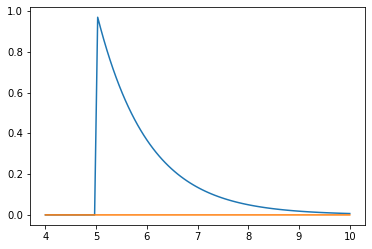

In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(4, 10, 100)
plt.plot(x, stats.expon(5).pdf(x))
plt.plot(x, stats.norm().pdf(x))

The true probability of the extreme event, $\mathrm{P} (X>5) $ is extremely small.

In [2]:
P_true = 1 - stats.norm().cdf(5)
P_true

2.866515719235352e-07

First try ordinary MC.

In [3]:
N= 10000
y = stats.norm().rvs(N)
P_mc = 1.0/N * np.sum(y > 5)
# estimate and relative error
P_mc, np.abs(P_mc - P_true)/P_true

(0.0, 1.0)

The result is completely off. Now we apply importance sampling with the truncated exponential

In [4]:
N = 10000
y = stats.expon(loc=5).rvs(N)
P_is = 1.0/N * np.sum(stats.norm().pdf(y)/stats.expon(loc=5).pdf(y))
# estimate and relative error
P_is, np.abs(P_is- P_true)/P_true

(2.946190959301109e-07, 0.02779515197879704)

The result is excellent, with a relative error of only $0.4\%.$